# Analysis of Borrowers' Default Risk

# Contents <a id='back'></a>

* [1. Introdution](#intro)
    * [1.1. Data review](#data_review)
    * [1.2. Conclusions](#data_review_conclusions)
* [2. Data preprocessing](#data_preprocessing)
    * [2.1 Missing values](#missing_values)
    * [2.2. Conclusion about missing values](#ausentes_conclusions)
* [3. Data transformation](#transformando)
* [4. Working with missing values](#working)
    * [4.1 Restoring missing values in total_income](#restaurar)
    * [4.2 Restoring missing values in days_employed](#restaurar_days)
* [5. Data Categorization](#categorizacao)
* [6. Verifying the hypotheses](#hipoteses)
    * [6.1. Is there a correlation between the number of children and timely payments?](#filhos)
    * [6.2. Is there a correlation between marital status and timely payments?](#status)
    * [6.3. Is there a correlation between income level and timely payments?](#renda)
    * [6.4. How does the purpose of credit affect the default rate?](#finalidade)
* [7. Final conclusions](#end)

## 1. Introdution <a id='intro'></a>

The objective of this project is to prepare a report for the loan division of a bank, determining whether a client's marital status and number of children impact their likelihood of defaulting on a loan. The bank already has some data on the creditworthiness of its clients.

[Return to index](#back)

## 1.1. Data review <a id='data_review'></a>

In this section, I will import the Panda library and then examine the DataFrame data containing users' credit scores. Since there is no information about the data quality, I will need to examine it before testing the hypothesis.

First, I will assess the quality of the data by checking the number of columns and rows in the DataFrame to determine if there are any significant issues. During data preprocessing, I will focus on addressing the most critical problems.

In [107]:
import pandas as pd

In [108]:
credit_scoring = pd.read_csv('C:/Users/tha_s/Downloads/credit_scoring_eng.csv')
print(credit_scoring)    

       children  days_employed  dob_years            education  education_id  \
0             1   -8437.673028         42    bachelor's degree             0   
1             1   -4024.803754         36  secondary education             1   
2             0   -5623.422610         33  Secondary Education             1   
3             3   -4124.747207         32  secondary education             1   
4             0  340266.072047         53  secondary education             1   
...         ...            ...        ...                  ...           ...   
21520         1   -4529.316663         43  secondary education             1   
21521         0  343937.404131         67  secondary education             1   
21522         1   -2113.346888         38  secondary education             1   
21523         3   -3112.481705         38  secondary education             1   
21524         2   -1984.507589         40  secondary education             1   

           family_status  family_status

In [109]:
credit_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [110]:
print(credit_scoring.head(10))

   children  days_employed  dob_years            education  education_id  \
0         1   -8437.673028         42    bachelor's degree             0   
1         1   -4024.803754         36  secondary education             1   
2         0   -5623.422610         33  Secondary Education             1   
3         3   -4124.747207         32  secondary education             1   
4         0  340266.072047         53  secondary education             1   
5         0    -926.185831         27    bachelor's degree             0   
6         0   -2879.202052         43    bachelor's degree             0   
7         0    -152.779569         50  SECONDARY EDUCATION             1   
8         2   -6929.865299         35    BACHELOR'S DEGREE             0   
9         0   -2188.756445         41  secondary education             1   

       family_status  family_status_id gender income_type  debt  total_income  \
0            married                 0      F    employee     0     40620.102   
1

The table contains eleven columns, and according to the documentation, we have the following Data Description:

- `children` - the number of children in the family
- `days_employed` - work experience in days
- `dob_years` - client's age in years
- `education` - client's age in years
- `education_id` - education identifier
- `family_status` - client's marital status
- `family_status_id` - marital status identifier
- `gender` - client's gender
- `income_type` - type of employment
- `debt` - whether there was any debt in loan repayment
- `total_income` - monthly income
- `purpose` - the purpose of obtaining a loan

With the displayed data sample, it is noticeable that there are issues that need further exploration. There are missing values in the 'total_income' and 'days_employed' columns. The other columns have the same number of records and do not contain missing values. Additionally, standardization of writing in the 'education' column is necessary. Also, in the 'days_employed' column, the values are negative, and the number of days worked seems high, not corresponding to a realistic lifespan expectancy.

In [111]:
credit_scoring.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


With the methods above, it's possible to notice that the columns 'days_employed' and 'total_income' have different numbers of non-null elements. Thus, with this observation, it is confirmed that each of these columns contains missing values.

We observe that in 'children', there is a minimum value of -1 and a maximum value of 20. In 'days_employed', there are exaggerated records that deserve attention. In 'dob_years', there is a presence of a minimum value of 0, which requires verification due to the study. In 'education_id' and 'family_status', the values range from 0 to 4, indicating that there are 5 categories for each column. 

The 'debt' column shows that 75% do not have debts related to loans. Additionally, in the 'total_income' column, the maximum value seems high and also deserves attention.

We will verify the filtered table with missing values in the first column with missing data.

In [112]:
credit_scoring[credit_scoring['days_employed'].isna()].head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
65,0,NaN,21,secondary education,1,unmarried,4,M,business,0,NaN,transactions with commercial real estate
67,0,NaN,52,bachelor's degree,0,married,0,F,retiree,0,NaN,purchase of the house for my family
72,1,NaN,32,bachelor's degree,0,married,0,M,civil servant,0,NaN,transactions with commercial real estate
82,2,NaN,50,bachelor's degree,0,married,0,F,employee,0,NaN,housing
83,0,NaN,52,secondary education,1,married,0,M,employee,0,NaN,housing


The missing values in the two columns are symmetric, not only because we verified that in both columns 'total_income' and 'days_employed', the number of rows in the filtered table is the same, but also because the missing data are present in both 'total_income' and 'days_employed' columns simultaneously. 

To confirm this observation, we will conduct additional investigations and count the missing values in all rows with missing values to confirm that the missing samples are of the same size.

In [113]:
subset = credit_scoring[(credit_scoring['days_employed'].isna())&(credit_scoring['total_income'].isna())].shape
print(subset)

(2174, 12)


[Return to index](#back)

## 1.2. Conclusions <a id='data_review_conclusions'></a> 

In an interim conclusion, we can already confirm that the missing values are present in the 'total_income' and 'days_employed' columns, and both sum up to 2174 records.

There are many missing values compared to the entire dataset. In this case, we will fill in the missing values. To investigate if there is any pattern for the missing values, we will isolate these values in a new table. 

Furthermore, for better understanding, we will consider the income type, number of children, and gender.

[Return to index](#back)

## 2. Data preprocessing <a id='data_preprocessing'></a>

In this section, I will address the identified issues to ensure that the data is ready for analysis. 

### 2.1. Missing values <a id='missing_values'></a>

We will investigate clients who do not have data on the identified characteristics and the column with missing values.

In [114]:
credit_scoring_null = credit_scoring[(credit_scoring['days_employed'].isna())&(credit_scoring['total_income'].isna())]
credit_scoring_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 12 to 21510
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          2174 non-null   int64  
 1   days_employed     0 non-null      float64
 2   dob_years         2174 non-null   int64  
 3   education         2174 non-null   object 
 4   education_id      2174 non-null   int64  
 5   family_status     2174 non-null   object 
 6   family_status_id  2174 non-null   int64  
 7   gender            2174 non-null   object 
 8   income_type       2174 non-null   object 
 9   debt              2174 non-null   int64  
 10  total_income      0 non-null      float64
 11  purpose           2174 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 220.8+ KB


In [115]:
credit_scoring_null.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,2174.000000,0.0,2174.000000,2174.000000,2174.000000,2174.000000,0.0
mean,0.552438,NaN,43.632015,0.800828,0.975161,0.078197,NaN
std,1.469356,NaN,12.531481,0.530157,1.418220,0.268543,NaN
min,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,NaN,34.000000,0.250000,0.000000,0.000000,NaN
50%,0.000000,NaN,43.000000,1.000000,0.000000,0.000000,NaN
75%,1.000000,NaN,54.000000,1.000000,1.000000,0.000000,NaN
max,20.000000,NaN,73.000000,3.000000,4.000000,1.000000,NaN


In the study table, it was noticed that there are missing values in the 'days_employed' and 'total_income' columns. Initially, the reason for these missing values was not identified. Additionally, the 'dob_years' and 'children' columns have problematic values that need attention. Correction of the writing will be necessary in the 'education' table. In the other tables, no missing values or problems requiring attention were identified.

**Possible reasons for missing values in the data**

At first glance, one possible reason for the missing values in the data could be due to the lack of a unique identifier for each client in the table. Therefore, rows with missing values may actually be duplicate records. The 'purpose' column could be a free-text field where each respondent answered as they wished, resulting in non-standardized responses and potentially leading to duplicate entries in the table.

To investigate this further, we will check for the presence of duplicate items without including the 'total_income' and 'days_employed' columns. If possible, we will remove any duplicates found.

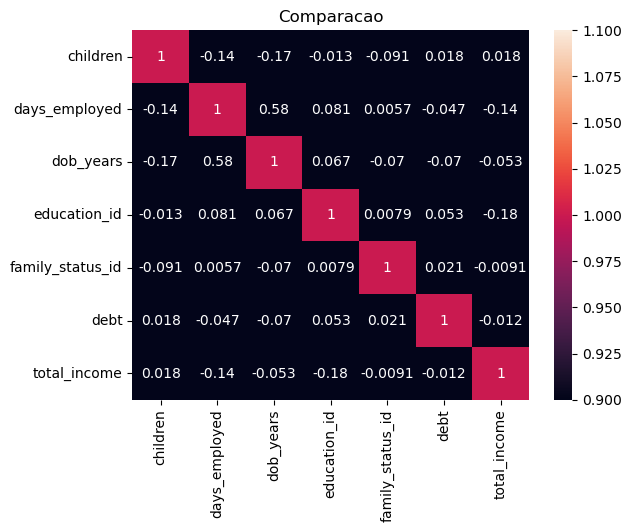

In [116]:
import seaborn as sns
heatmap = sns.heatmap(credit_scoring.corr(), vmin = 1, vmax=1, annot=True)
heatmap.set_title('Comparacao');

**Intermediate Conclusion**

We have explored the distribution across the entire dataset; however, we cannot draw conclusions yet. 

We will delve deeper into our dataset, considering possible reasons for the missing data, and examine if there is any pattern that suggests the missing values are not random.

In [12]:
credit_scoring_null['income_type'].value_counts(normalize=True)

employee         0.508280
business         0.233671
retiree          0.189972
civil servant    0.067617
entrepreneur     0.000460
Name: income_type, dtype: float64

In [13]:
credit_scoring['income_type'].value_counts(normalize=True)

employee                       0.516562
business                       0.236237
retiree                        0.179141
civil servant                  0.067782
unemployed                     0.000093
entrepreneur                   0.000093
student                        0.000046
paternity / maternity leave    0.000046
Name: income_type, dtype: float64

In [14]:
credit_scoring_null['children'].value_counts(normalize=True)

 0     0.661914
 1     0.218491
 2     0.093836
 3     0.016559
 20    0.004140
 4     0.003220
-1     0.001380
 5     0.000460
Name: children, dtype: float64

In [15]:
credit_scoring['children'].value_counts(normalize=True)

 0     0.657329
 1     0.223833
 2     0.095470
 3     0.015331
 20    0.003531
-1     0.002184
 4     0.001905
 5     0.000418
Name: children, dtype: float64

In [16]:
credit_scoring_null['gender'].value_counts(normalize=True)

F    0.682613
M    0.317387
Name: gender, dtype: float64

In [17]:
credit_scoring['gender'].value_counts(normalize=True)

F      0.661370
M      0.338583
XNA    0.000046
Name: gender, dtype: float64

In [16]:
credit_scoring_null['income_type'].value_counts(normalize=True)

employee         0.508280
business         0.233671
retiree          0.189972
civil servant    0.067617
entrepreneur     0.000460
Name: income_type, dtype: float64

In [17]:
credit_scoring['income_type'].value_counts(normalize=True)

employee                       0.516562
business                       0.236237
retiree                        0.179141
civil servant                  0.067782
unemployed                     0.000093
entrepreneur                   0.000093
paternity / maternity leave    0.000046
student                        0.000046
Name: income_type, dtype: float64

[Return to index](#back)

## 2.2. Conclusions about missing values <a id='ausentes_conclusions'></a>

For the missing values, we will first calculate the mean and median, and between the two, whichever better suits the present study will be used to replace the missing values.

As next steps for data transformation:

- In the 'education' column, the spelling is not standardized and will be corrected.
- In the 'dob_years' column, with the presence of the value 0, we will calculate the mean and median, and choose the best option to replace the value 0.
- In the 'gender' column, since it is a unique value, we will replace it with 'UNKNOWN'.
- In the 'children' column, the values -1 and 20 will be checked and corrected.
- In the 'days_employed' column, negative values will be modified to their absolute values.

We will also check for duplicates, and if any are found, we will analyze the best alternative for their resolution.

[Return to index](#back)

## 3. Data transformation <a id='transformacao'></a>

We will examine each column to identify and correct potential issues. 

We'll start by removing duplicates and correcting educational information, if necessary. To do this, we'll analyze all values in the education column to identify any variations in spelling that need to be corrected.

In [117]:
credit_scoring['education'].value_counts() 

secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
Graduate Degree            1
GRADUATE DEGREE            1
Name: education, dtype: int64

In [118]:
credit_scoring['education'] = credit_scoring['education'].str.lower()

In [119]:
credit_scoring['education'].value_counts() 

secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

Vamos ver a distribuição de valores na coluna `children`.

In [120]:
credit_scoring['children'].value_counts() 

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

The 'children' column raises some concerns as it includes a negative number of children and also indicates that certain individuals have 20 children. These errors likely occurred due to incorrectly inputted information. However, despite not being excessively high, I won't delete the incorrect entries. In my opinion, the best option would be to replace the data with 2 and 1.

In [121]:
credit_scoring['children'] = credit_scoring['children'].replace(20, 2)
credit_scoring['children'] = credit_scoring['children'].replace(-1, 1)

In [122]:
credit_scoring['children'].value_counts() 

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

We will examine the data in the days_employed column to identify any issues, and calculate the percentage.

In [123]:
credit_scoring['days_employed'].value_counts()

-8437.673028      1
-3507.818775      1
 354500.415854    1
-769.717438       1
-3963.590317      1
                 ..
-1099.957609      1
-209.984794       1
 398099.392433    1
-1271.038880      1
-1984.507589      1
Name: days_employed, Length: 19351, dtype: int64

In [124]:
credit_scoring['days_employed'].describe()

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64

We observed that the number of problematic data points is high, which could be due to some technical issues.

Firstly, we will change the negative sign so that we have positive values. Then, considering that this column contains extreme values and the maximum number in 'days_employed' is 401,755 days, which is more than a thousand years of work, and that the oldest person in the table is 75 years old, we assume that the number of days worked by this person would be 27,375, and thus it would not be possible for them to have worked more than that in their entire life.

As a result, we will analyze the number of days worked and adjust the values of those who have more than 27,375 days worked to the median of the values of those who have records of days worked below this value.

We will not discard these problematic rows but rather treat them.

In [125]:
credit_scoring.groupby('income_type')['days_employed'].median()/365

income_type
business                         -4.239403
civil servant                    -7.368132
employee                         -4.312884
entrepreneur                     -1.426981
paternity / maternity leave      -9.032219
retiree                        1000.584401
student                          -1.585621
unemployed                     1003.873021
Name: days_employed, dtype: float64

In [126]:
credit_scoring.groupby('income_type')['days_employed'].mean()/365

income_type
business                         -5.784998
civil servant                    -9.314786
employee                         -6.373970
entrepreneur                     -1.426981
paternity / maternity leave      -9.032219
retiree                        1000.009565
student                          -1.585621
unemployed                     1003.873021
Name: days_employed, dtype: float64

In [127]:
credit_scoring['days_employed'] = credit_scoring['days_employed'].abs()

In [128]:
credit_scoring.groupby('income_type')['days_employed'].median()/365

income_type
business                          4.239403
civil servant                     7.368132
employee                          4.312884
entrepreneur                      1.426981
paternity / maternity leave       9.032219
retiree                        1000.584401
student                           1.585621
unemployed                     1003.873021
Name: days_employed, dtype: float64

In [129]:
credit_scoring_days = credit_scoring[credit_scoring['days_employed'] < 27365]
days_employed_median = credit_scoring_days['days_employed'].median()
days_employed_median

1630.0193809778218

In [130]:
credit_scoring_days_maior = credit_scoring[credit_scoring['days_employed'] > 27365]
credit_scoring_days_maior


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
18,0,400281.136913,53,secondary education,1,widow / widower,2,F,retiree,0,9091.804,buying a second-hand car
24,1,338551.952911,57,secondary education,1,unmarried,4,F,retiree,0,46487.558,transactions with commercial real estate
25,0,363548.489348,67,secondary education,1,married,0,M,retiree,0,8818.041,buy real estate
30,1,335581.668515,62,secondary education,1,married,0,F,retiree,0,27432.971,transactions with commercial real estate
...,...,...,...,...,...,...,...,...,...,...,...,...
21505,0,338904.866406,53,secondary education,1,civil partnership,1,M,retiree,0,12070.399,to have a wedding
21508,0,386497.714078,62,secondary education,1,married,0,M,retiree,0,11622.175,property
21509,0,362161.054124,59,bachelor's degree,0,married,0,M,retiree,0,11684.650,real estate transactions
21518,0,373995.710838,59,secondary education,1,married,0,F,retiree,0,24618.344,purchase of a car


In [131]:
credit_scoring.loc[credit_scoring['days_employed'] > 27365, 'days_employed'] = days_employed_median

We will now examine the age of the client and check for any issues. If there are any suspicious values, we will calculate the percentage.

In [132]:
credit_scoring['dob_years'].value_counts(normalize=True)*100

35    2.866434
40    2.829268
41    2.819977
34    2.801394
38    2.778165
42    2.773519
33    2.699187
39    2.662021
31    2.601626
36    2.578397
44    2.541231
29    2.531940
30    2.508711
48    2.499419
37    2.494774
50    2.387921
43    2.383275
32    2.369338
49    2.360046
28    2.336818
45    2.308943
27    2.290360
56    2.262485
52    2.248548
47    2.229965
54    2.225319
46    2.206736
58    2.141696
57    2.137050
53    2.132404
51    2.081301
59    2.062718
55    2.058072
26    1.895470
60    1.751452
25    1.658537
61    1.649245
62    1.635308
63    1.249710
64    1.231127
24    1.226481
23    1.180023
65    0.901278
22    0.850174
66    0.850174
67    0.775842
21    0.515679
0     0.469222
68    0.459930
69    0.394890
70    0.301974
71    0.269454
20    0.236934
72    0.153310
19    0.065041
73    0.037166
74    0.027875
75    0.004646
Name: dob_years, dtype: float64

There is a problematic value in the age column, as there is an age of 0 present. Since for this study, we need information about loans, there is no reason for people to have an age of 0. In my understanding, this number likely occurred because some people did not provide their age. 

I believe this value significantly affects the analysis, and to resolve it, we will apply the median method.

In [133]:
age_avg = credit_scoring['dob_years'].median()
credit_scoring['dob_years'] = credit_scoring['dob_years'].replace(0, age_avg)

In [134]:
credit_scoring['dob_years'].value_counts() 

42    698
35    617
40    609
41    607
34    603
38    598
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
22    183
66    183
67    167
21    111
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

Now we will examine the family_status column. We will check what types of values exist and what problems need to be resolved.

In [135]:
credit_scoring['family_status'].value_counts()

married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64

It is noted that in the current column, there is no need for correction in the family_status column, as there are no problematic values present.

After inspecting the gender column, we observe the types of values present and identify any problems that need to be addressed.

In [136]:
credit_scoring['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

In [137]:
credit_scoring[credit_scoring['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358.600502,24,some college,2,civil partnership,1,XNA,business,0,32624.825,buy real estate


In [138]:
credit_scoring.drop(credit_scoring[credit_scoring['gender'] == 'XNA'].index, inplace=True)

In [139]:
credit_scoring['gender'].value_counts()

F    14236
M     7288
Name: gender, dtype: int64

We will examine the income_type column. We will check what types of values exist and what problems need to be resolved.

In [140]:
credit_scoring['income_type'].value_counts()

employee                       11119
business                        5084
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

It is noted that there is no need for correction in the family_status column as there are no problematic values present.

Before moving on to the next topic, we are going to check if there are any duplicates in the dataframe.

In [141]:
credit_scoring.duplicated().sum()

72

In [142]:
credit_scoring = credit_scoring.drop_duplicates().reset_index(drop=True)

In [143]:
credit_scoring.duplicated().sum()

0

In [144]:
credit_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21452 entries, 0 to 21451
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21452 non-null  int64  
 1   days_employed     19350 non-null  float64
 2   dob_years         21452 non-null  int64  
 3   education         21452 non-null  object 
 4   education_id      21452 non-null  int64  
 5   family_status     21452 non-null  object 
 6   family_status_id  21452 non-null  int64  
 7   gender            21452 non-null  object 
 8   income_type       21452 non-null  object 
 9   debt              21452 non-null  int64  
 10  total_income      19350 non-null  float64
 11  purpose           21452 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


After this analysis, duplicates were removed from the dataset. 

We examined each column of the table to make it clearer and more understandable for better data analysis. Every column was scrutinized to check for errors, and those observed were corrected. Finally, we found duplicate data, and due to the low incidence, we removed the rows with duplicate information.

[Return to index](#back)

# 4. Working with missing values <a id='working'></a>

To expedite work with certain data, I will use dictionaries for some values, where IDs are provided.

Dictionaries will facilitate the control and mapping of data, so for this study, we will use the family and education dictionaries, as these data will be necessary for the current analysis.

In [145]:
family_dic = credit_scoring[['family_status', 'family_status_id']]
family_dic = family_dic.drop_duplicates().reset_index(drop=True)
family_dic

,family_status,family_status_id
0,married,0
1,civil partnership,1
2,widow / widower,2
3,divorced,3
4,unmarried,4


In [146]:
education_dic = credit_scoring[['education_id', 'education', 'total_income']]
education_dic = education_dic.drop_duplicates().reset_index(drop=True)
education_dic

,education_id,education,total_income
0,0,bachelor's degree,40620.102
1,1,secondary education,17932.802
2,1,secondary education,23341.752
3,1,secondary education,42820.568
4,1,secondary education,25378.572
...,...,...,...
19348,1,secondary education,35966.698
19349,1,secondary education,24959.969
19350,1,secondary education,14347.610
19351,1,secondary education,39054.888


[Return to index](#back)

### 4.1 Restoring missing values in total_income <a id='restaurar'></a>

The column total_income has missing values and need to be addressed. For the current study, we cannot simply eliminate the missing values as doing so could interfere with the analysis and results of the study. To fix them, we will use the median method, and with this value, we will replace those that are missing in the dataset.

We will start by addressing the missing values in the total income. We will create a new column with the age category. I believe this strategy can help in calculating values for total income.

In [147]:
def age_category(age):
        if age <= 40:
            return 'young adult' 
        if age <= 64:
            return 'adult' 
        return 'old' 

In [148]:
print(age_category(19))
print(age_category(62))
print(age_category(72))

young adult
adult
old


In [149]:
credit_scoring['age_category'] = credit_scoring['dob_years'].apply(age_category)

In [150]:
print(credit_scoring.head(10))

   children  days_employed  dob_years            education  education_id  \
0         1    8437.673028         42    bachelor's degree             0   
1         1    4024.803754         36  secondary education             1   
2         0    5623.422610         33  secondary education             1   
3         3    4124.747207         32  secondary education             1   
4         0    1630.019381         53  secondary education             1   
5         0     926.185831         27    bachelor's degree             0   
6         0    2879.202052         43    bachelor's degree             0   
7         0     152.779569         50  secondary education             1   
8         2    6929.865299         35    bachelor's degree             0   
9         0    2188.756445         41  secondary education             1   

       family_status  family_status_id gender income_type  debt  total_income  \
0            married                 0      F    employee     0     40620.102   
1

The total income of individuals typically depends on several factors, including age, education, and employment status. With age categorized and a new column created, data analysis becomes easier. 

We will consider the factors on which income generally depends and then determine the mean and median values so that one of these can be used to replace missing values.

We are going to create a table containing only complete data, without any missing values. This data will be used to restore the missing values. We will also observe the mean and median values.

In [151]:
credit_scoring_no_nan = credit_scoring[credit_scoring['days_employed'].isnull() != True]
credit_scoring_no_nan.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,adult
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,young adult
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,young adult
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,young adult
4,0,1630.019381,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,adult
5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,young adult
6,0,2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,adult
7,0,152.779569,50,secondary education,1,married,0,M,employee,0,21731.829,education,adult
8,2,6929.865299,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,young adult
9,0,2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,adult


In [152]:
print(credit_scoring.groupby('education')['total_income'].mean())

education
bachelor's degree      33142.802434
graduate degree        27960.024667
primary education      21144.882211
secondary education    24594.503037
some college           29040.132990
Name: total_income, dtype: float64


In [153]:
print(credit_scoring.groupby('education')['total_income'].median())

education
bachelor's degree      28054.5310
graduate degree        25161.5835
primary education      18741.9760
secondary education    21836.5830
some college           25608.7945
Name: total_income, dtype: float64


We compared the results already obtained and understood that the data has significant outliers, so we concluded that the median method will be the best approach for the study. Therefore, we will fill in the missing values with the median value.

In [154]:
credit_scoring['total_income'] = (credit_scoring['total_income'].fillna(credit_scoring.groupby('age_category')['total_income'].transform('median')))

In [155]:
credit_scoring['total_income'].isna().sum()

0

In [156]:
credit_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21452 entries, 0 to 21451
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21452 non-null  int64  
 1   days_employed     19350 non-null  float64
 2   dob_years         21452 non-null  int64  
 3   education         21452 non-null  object 
 4   education_id      21452 non-null  int64  
 5   family_status     21452 non-null  object 
 6   family_status_id  21452 non-null  int64  
 7   gender            21452 non-null  object 
 8   income_type       21452 non-null  object 
 9   debt              21452 non-null  int64  
 10  total_income      21452 non-null  float64
 11  purpose           21452 non-null  object 
 12  age_category      21452 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


In [157]:
credit_scoring.shape

(21452, 13)

We found no errors when filling in the missing values with the median value. The total number of values in this column corresponds to the number of values in others.

[Return to index](#back)

###  4.2 Restaurar valores ausentes em `days_employed` <a id='restaurar_days'></a>

The column "days_employed" has missing values and needs to be addressed. To do this, let's consider the parameters that can help restore the missing values in this column. 

We will then determine whether to use mean or median values to replace the missing values. We will conduct a similar analysis to what was done when restoring data in the previous column.

In [158]:
credit_scoring.groupby('income_type')['days_employed'].median()

income_type
business                       1546.333214
civil servant                  2689.368353
employee                       1574.202821
entrepreneur                    520.848083
paternity / maternity leave    3296.759962
retiree                        1630.019381
student                         578.751554
unemployed                     1630.019381
Name: days_employed, dtype: float64

In [159]:
credit_scoring.groupby('income_type')['days_employed'].mean()

income_type
business                       2111.470404
civil servant                  3399.896902
employee                       2326.499216
entrepreneur                    520.848083
paternity / maternity leave    3296.759962
retiree                        1630.019381
student                         578.751554
unemployed                     1630.019381
Name: days_employed, dtype: float64

To restore the values in the 'days_employed' column, we will use a function that calculates medians based on the identified parameter - 'income_type'. The median will be used because the median values of 'income_type' for the customer sufficiently describe the typical values.

In [160]:
days_groupby = credit_scoring.groupby('income_type')['days_employed'].median()

def fill_days_income(income_type):
    
    
    try:
        return days_groupby[income_type]
    except:
        return 'error'

In [161]:
fill_days_income('business')

1546.3332141566746

In [162]:
credit_scoring['days_employed_median'] = credit_scoring['income_type'].apply(fill_days_income)

In [163]:
credit_scoring['days_employed_median'].value_counts()

1574.202821    11083
1546.333214     5077
1630.019381     3831
2689.368353     1457
520.848083         2
578.751554         1
3296.759962        1
Name: days_employed_median, dtype: int64

In [164]:
credit_scoring['days_employed'] = credit_scoring['days_employed'].fillna(credit_scoring['days_employed_median'])

In [165]:
credit_scoring.isnull().sum()

children                0
days_employed           0
dob_years               0
education               0
education_id            0
family_status           0
family_status_id        0
gender                  0
income_type             0
debt                    0
total_income            0
purpose                 0
age_category            0
days_employed_median    0
dtype: int64

In [166]:
credit_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21452 entries, 0 to 21451
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   children              21452 non-null  int64  
 1   days_employed         21452 non-null  float64
 2   dob_years             21452 non-null  int64  
 3   education             21452 non-null  object 
 4   education_id          21452 non-null  int64  
 5   family_status         21452 non-null  object 
 6   family_status_id      21452 non-null  int64  
 7   gender                21452 non-null  object 
 8   income_type           21452 non-null  object 
 9   debt                  21452 non-null  int64  
 10  total_income          21452 non-null  float64
 11  purpose               21452 non-null  object 
 12  age_category          21452 non-null  object 
 13  days_employed_median  21452 non-null  float64
dtypes: float64(3), int64(5), object(6)
memory usage: 2.3+ MB


We found no errors when filling in the missing values with the median value. The total number of values in this column corresponds to the number of values in others.

[Return to index](#back)

## 5. Data Categorization <a id='categorizacao'></a>

To answer the questions and test hypotheses, it will be necessary to categorize some data. We will observe which data needs to be categorized. We will check both text data and numerical data that need to be categorized. 

In [80]:
credit_scoring.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income,days_employed_median
count,21524.000000,21524.000000,21524.000000,21524.000000,21524.000000,21524.000000,21524.000000,21524.000000
mean,0.479744,2166.614801,43.491358,0.817181,0.972542,0.080886,26425.962840,1653.151814
std,0.755539,2007.487706,12.218156,0.548092,1.420357,0.272667,15662.247762,281.240806
min,0.000000,24.141633,19.000000,0.000000,0.000000,0.000000,3306.762000,520.848083
25%,0.000000,1025.522620,34.000000,1.000000,0.000000,0.000000,17247.356500,1574.202821
50%,0.000000,1630.019381,42.000000,1.000000,0.000000,0.000000,22996.042500,1574.202821
75%,1.000000,2570.051846,53.000000,1.000000,1.000000,0.000000,31286.192250,1574.202821
max,5.000000,18388.949901,75.000000,4.000000,4.000000,1.000000,362496.645000,3296.759962


In [81]:
credit_scoring['purpose'].value_counts()

wedding ceremony                            797
having a wedding                            777
to have a wedding                           774
real estate transactions                    676
buy commercial real estate                  664
buying property for renting out             653
housing transactions                        653
transactions with commercial real estate    651
purchase of the house                       647
housing                                     647
purchase of the house for my family         641
construction of own property                635
property                                    634
transactions with my real estate            630
building a real estate                      626
buy real estate                             623
building a property                         620
purchase of my own house                    620
housing renovation                          612
buy residential real estate                 607
buying my own car                       

We are going to check unique values.

In [82]:
credit_scoring['purpose'].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

Based on the unique values, the main groups identified are related to education, home purchase, car purchase, and marriage. To improve the visualization of the table and better analyze the types of loans taken, we have chosen to categorize the 'purpose' column.

Considering these themes, we will likely want to categorize our data. With the data categorized, we will create a column with the categories and their corresponding values.

In [84]:
def cat_purpose (row):
    if 'car' in row['purpose']:
        return 'auto'
    if 'hous' in row['purpose'] or 'prop' in row['purpose'] or 'real est' in row['purpose']:
        return 'property'
    if 'wedd' in row['purpose']:
        return 'wedding'
    if 'educ' in row['purpose'] or 'uni' in row['purpose']:
        return 'education'
    
print(cat_purpose(credit_scoring.loc[2]))
print(cat_purpose(credit_scoring.loc[3]))
print(cat_purpose(credit_scoring.loc[4]))
print(cat_purpose(credit_scoring.loc[5]))

property
education
wedding
property


In [ ]:
def rating_genre(row):
    genre = row['genre']
    rating = row['rating']
    
    if genre == 'Platform' or 'Puzzle' or 'Sports' or 'Misc':
        return 'E'
    
    return rating
rating_genre(df.iloc[1])
df['rating'] = df.apply(rating_genre, axis=1)

In [86]:
credit_scoring['cat_purpose'] = credit_scoring.apply(cat_purpose, axis=1)
credit_scoring['cat_purpose'].value_counts()

property     10839
auto          4315
education     4022
wedding       2348
Name: cat_purpose, dtype: int64

Focusing on better visualization of the table and improved analysis, we have also chosen to categorize the 'total_income' column to provide information about income classes. With the data categorized, we will create a new column with the categories and their corresponding values.

In [90]:
def economic_class(row): 
    if row['total_income'] <= 16000: 
        return 'econimic class' 
    elif row['total_income'] <= 24000: 
        return 'executive class' 
    elif row['total_income'] <= 32000: 
        return 'first class' 
    else: return 'other'
    
print(economic_class(credit_scoring.loc[1]))
print(economic_class(credit_scoring.loc[2]))
print(economic_class(credit_scoring.loc[3]))

executive class
executive class
other


In [91]:
credit_scoring['economic_class'] = credit_scoring.apply(economic_class, axis=1)

In [92]:
credit_scoring['economic_class'].value_counts()

executive class    7878
other              5065
econimic class     4463
first class        4118
Name: economic_class, dtype: int64

In [76]:
credit_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21452 entries, 0 to 21451
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   children              21452 non-null  int64  
 1   days_employed         21452 non-null  float64
 2   dob_years             21452 non-null  float64
 3   education             21452 non-null  object 
 4   education_id          21452 non-null  int64  
 5   family_status         21452 non-null  object 
 6   family_status_id      21452 non-null  int64  
 7   gender                21452 non-null  object 
 8   income_type           21452 non-null  object 
 9   debt                  21452 non-null  int64  
 10  total_income          21452 non-null  float64
 11  purpose               21452 non-null  object 
 12  age_category          21452 non-null  object 
 13  days_employed_median  21452 non-null  float64
 14  cat_purpose           21452 non-null  object 
 15  economic_class     

[Return to index](#back)

## 6. Verifying the hypotheses <a id='hipoteses'></a>

### 6.1. Is there a correlation between the number of children and timely payments? <a id='filhos'></a>

To verify this hypothesis, we will examine the data regarding the number of children and timely payments. We will then calculate the default rate based on the number of children.

In [167]:
pivot_table_pay_children = credit_scoring.pivot_table(index = 'children', columns='debt', aggfunc='count')
pivot_table_pay_children

age_category         days_employed         days_employed_median  \
debt                0       1             0       1                    0   
children                                                                   
0             13026.0  1063.0       13026.0  1063.0              13026.0   
1              4410.0   445.0        4410.0   445.0               4410.0   
2              1926.0   202.0        1926.0   202.0               1926.0   
3               303.0    27.0         303.0    27.0                303.0   
4                37.0     4.0          37.0     4.0                 37.0   
5                 9.0     NaN           9.0     NaN                  9.0   

                 dob_years         education          ... family_status_id  \
debt           1         0       1         0       1  ...                0   
children                                              ...                    
0         1063.0   13026.0  1063.0   13026.0  1063.0  ...          13026.0   
1          445.0    4410.0   445.0    4410.0   445.0  ...           4410.0   
2          202.0    1926.0   202.0    1926.0   202.0  ...           1926.0   
3           27.0     303.0    27.0     303.0    27.0  ...            303.0   
4            4.0      37.0     4.0      37.0     4.0  ...             37.0   
5            NaN       9.0     NaN       9.0     NaN  ...              9.0   

                   gender         income_type          purpose          \
debt           1        0       1           0       1        0       1   
children                                                                 
0         1063.0  13026.0  1063.0     13026.0  1063.0  13026.0  1063.0   
1          445.0   4410.0   445.0      4410.0   445.0   4410.0   445.0   
2          202.0   1926.0   202.0      1926.0   202.0   1926.0   202.0   
3           27.0    303.0    27.0       303.0    27.0    303.0    27.0   
4            4.0     37.0     4.0        37.0     4.0     37.0     4.0   
5            NaN      9.0     NaN         9.0     NaN      9.0     NaN   

         total_income          
debt                0       1  
children                       
0             13026.0  1063.0  
1              4410.0   445.0  
2              1926.0   202.0  
3               303.0    27.0  
4                37.0     4.0  
5                 9.0     NaN  

[6 rows x 24 columns]

In [168]:
credit_scoring[credit_scoring['debt'] == 1].groupby('children')['debt'].count()/credit_scoring.groupby('children')['debt'].count()

children
0    0.075449
1    0.091658
2    0.094925
3    0.081818
4    0.097561
5         NaN
Name: debt, dtype: float64

The conclusion drawn is that individuals with 1 to 2 children are more likely to pay their debts on time and avoid default compared to those with 3 or more children. 

So, individuals with fewer children tend to have their loans paid on time.

[Return to index](#back)

### 6.2. Is there a correlation between marital status and timely payments?  <a id='status'></a>

To verify this hypothesis, we will examine the data regarding marital status and timely payments. We will then calculate the default rate based on marital status.

In [169]:
pivot_table_family = credit_scoring.pivot_table(index='family_status', columns='debt', values= 'dob_years', aggfunc='count')
pivot_table_family

debt,0,1
family_status,,
civil partnership,3761,388
divorced,1110,85
married,11408,931
unmarried,2536,274
widow / widower,896,63


In [170]:
credit_scoring[credit_scoring['debt'] == 1].groupby('family_status')['debt'].count()/credit_scoring.groupby('family_status')['debt'].count()

family_status
civil partnership    0.093517
divorced             0.071130
married              0.075452
unmarried            0.097509
widow / widower      0.065693
Name: debt, dtype: float64

Em relacao ao status e o pagamento em dia podemos concluir que a probabilidade daqueles que estao em uma civil partnership e solteiros ficarem inadimplentes por conta de seus emprestimos e maior se comparando com aqueles que possuem outro estado civil. Nota-se que os que sao viuvos normalmente nao ficam inadimplentes.

[Return to index](#back)

### 6.3. Is there a correlation between income level and timely payments? <a id='renda'></a>

To verify this hypothesis, we will examine the data regarding income level and timely payments. We will then calculate the default rate based on income level.

In [103]:
pivot_table_income_level = credit_scoring.pivot_table(index='total_income', columns='debt', values='dob_years', aggfunc='count', margins=True)
pivot_table_income_level

debt,0,1,All
total_income,,,
3306.762,NaN,1.0,1
3392.845,1.0,NaN,1
3418.824,1.0,NaN,1
3471.216,1.0,NaN,1
3503.298,1.0,NaN,1
...,...,...,...
274402.943,1.0,NaN,1
276204.162,1.0,NaN,1
352136.354,NaN,1.0,1


In [104]:
credit_scoring[credit_scoring['debt'] == 1].groupby('economic_class')['debt'].count()/credit_scoring.groupby('economic_class')['debt'].count()

economic_class
econimic class     0.079319
executive class    0.083905
first class        0.089364
other              0.070681
Name: debt, dtype: float64

Regarding the correlation between income level and timely payments, we can observe that the majority of those who are in default are from a higher economic class.

[Return to index](#back)

### 6.4. How does the purpose of credit affect the default rate? <a id='finalidade'></a>

To verify this hypothesis, we will examine the default rates for each purpose of credit.

In [105]:
purpose_pivot = credit_scoring.pivot_table(index = 'cat_purpose', columns = 'debt', values = 'dob_years', aggfunc='count')
purpose_pivot.reset_index().sort_values(by=1, ascending=True)

debt,cat_purpose,0,1
3,wedding,2162,186
1,education,3652,370
0,auto,3912,403
2,property,10057,782


It can be said that the purpose of credit affects default rates. Those who have a loan for purposes related to categories such as Car ('auto') and Education ('education') are more likely to default. Along the same lines, it is observed that those with a loan for purposes related to Home ('house') are less likely to default.

[Return to index](#back)

# 7. Final conclusions <a id='end'></a>

To summarize, we began by verifying the dataset, noting the initial presence of 12 columns and 21,525 rows. Upon checking for missing values in the columns, we identified the presence of missing values in the 'days_employed' and 'total_income' columns. Additionally, in the 'days_employed' column, we observed negative values and excessively high numbers of days worked, which seemed inconsistent with realistic expectations.

In the 'total_income' column, the values appeared to be extremely high, which we further investigated throughout the study. Furthermore, during the initial analysis, we noticed the need for standardizing the writing in the 'education' column and flagged anomalies such as -1 and 20 in the 'children' column, as well as 0 in the 'dob_years' column, which seemed unusual. Continuing the analysis, we found that the missing values were symmetrical not only because the number of rows in the filtered table was the same for both the 'total_income' and 'days_employed' columns but also because the missing data was present in both columns simultaneously.

During the data transformation, we concluded the following:

- In the 'education' column, the spelling was not standardized due to it being an open text field, which was corrected.
- In the 'dob_years' column, the presence of the value 0 likely occurred because some individuals chose not to disclose their age. We corrected this error by using the median and replacing these values.
- In the 'gender' column, a similar situation occurred, where individuals might not have identified as F or M and entered a different value. Since it was a unique value, we resolved it by replacing it with TRUE.
- In the 'children' column, errors likely occurred due to incorrect data entry. To correct this, we replaced the values -1 and 20 with 1 and 2.
- In the 'days_employed' column, issues may have arisen due to technical problems. To enhance the study, we treated the values to be absolute and not negative.

Regarding the missing values, we believe that due to the table not having a unique identifier for each customer, the rows with missing values were actually duplicate records when filling out the 'purpose' column, which was an open text field.

About the 72 duplicate entries found, we decided to remove them from the dataset due to their low incidence, removing the rows that contained duplicate information.

Unlike the duplicate data, missing values were treated differently since simply eliminating them could disrupt the analysis and study results. To address this, we used the median method to fill in the missing values in the dataset, ensuring a more robust analysis.

To assist in calculating values for the total_income column, we categorized the age column and created a new column called age_category. Considering the factors on which income generally depends and understanding that the data contains significant outliers, we used median values to replace those missing.

In a similar approach to restoring data in the previous column, we were able to restore values in the 'days_employed' column using a function to calculate medians based on the identified parameter - income_type. The median was used because the median values of the income_type for the customer sufficiently described the typical values.

Additionally, to aid in the final conclusions, we categorized the purpose and total_income columns. We chose these columns so that we could better visualize the table and thus analyze the types of loans and income classes more effectively.

Regarding the hypotheses, we conclude:
- Those who have fewer children are more likely to pay their debts on time, unlike those who have more children.
- About the marital status and timely payments, the probability of those in a civil partnership and singles defaulting on their loans is higher compared to those with other marital statuses. Additionally, widows are less likely to default.
- Individuals from higher economic classes are more likely to default.
- Lastly, the purpose of credit affects default rates.

[Return to index](#back)